In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd
# Lista para armazenar cada GeoDataFrame
frames = []

# Loop para ler cada arquivo GeoJSON e adicioná-lo à lista de frames
for i in range(1, 12):
    file_name = f"ucbt_{i:02d}_filtrada.geojson"
    gdf = gpd.read_file(file_name)
    frames.append(gdf)

# Concatenar todos os GeoDataFrames na lista em um único GeoDataFrame
final_gdf = pd.concat(frames, ignore_index=True)


In [3]:
def create_map_point(final_gdf):
    final_gdf_base = final_gdf.copy() # Criar uma cópia do DataFrame

    for i in range(1, 13):
        final_gdf_men = final_gdf_base[(final_gdf_base[f"ENE_{i:02d}"] < 5000) & (final_gdf_base[f"ENE_{i:02d}"] > 0)]
        optimal_clusters = 4

        kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0).fit(final_gdf_men[[f"ENE_{i:02d}"]])
        final_gdf_men['cluster'] = kmeans.labels_

        fig, axes = plt.subplots(2, 2, figsize=(10, 10))

        for j, ax in enumerate(axes.flatten()):
            enel_sp.plot(ax=ax, color="white", edgecolor="black")
            final_gdf_men[final_gdf_men['cluster'] == j].plot(ax=ax, column=f"ENE_{i:02d}", cmap="YlOrRd", markersize=4, linewidth=0.5, edgecolor="0.8", legend=True)
            ax.set_title(f'Cluster {j+1}')

            # Ajuste a formatação dos eixos para exibir as coordenadas
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')

        plt.tight_layout()
        plt.savefig(f"clusters_with_coordinates_{i:02d}.png", dpi=600)
        


In [6]:
def create_map_point(final_gdf):
    final_gdf_base = final_gdf.copy() # Criar uma cópia do DataFrame
    meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]

    for i in range(1, 13, 3):
        final_gdf_men = final_gdf_base[(final_gdf_base[f"ENE_{i:02d}"] < 5000) & (final_gdf_base[f"ENE_{i:02d}"] > 0)].copy() # Fazer cópia aqui para evitar SettingWithCopyWarning
        optimal_clusters = 4

        kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0).fit(final_gdf_men[[f"ENE_{i:02d}"]])
        final_gdf_men['cluster'] = kmeans.labels_

        fig, axes = plt.subplots(2, 2, figsize=(10, 10))
        fig.suptitle(f"Consumo das UCBT's do mês de {meses[i-1]}", fontsize=16) # Título geral

        for j, ax in enumerate(axes.flatten()):
            enel_sp.plot(ax=ax, color="white", edgecolor="black")
            cluster_data = final_gdf_men[final_gdf_men['cluster'] == j]
            min_consumo = cluster_data[f"ENE_{i:02d}"].min()
            max_consumo = cluster_data[f"ENE_{i:02d}"].max()
            cluster_data.plot(ax=ax, column=f"ENE_{i:02d}", cmap="YlOrRd", markersize=3, linewidth=0.5, edgecolor="0.8", legend=True)
            ax.set_title(f'Consumo de {np.round(min_consumo, 2)} a {np.round(max_consumo, 2)}') # Título de cada cluster
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')

        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajuste para não cortar o título
        plt.savefig(f"clusters_with_coordinates_{i:02d}.png", dpi=600)


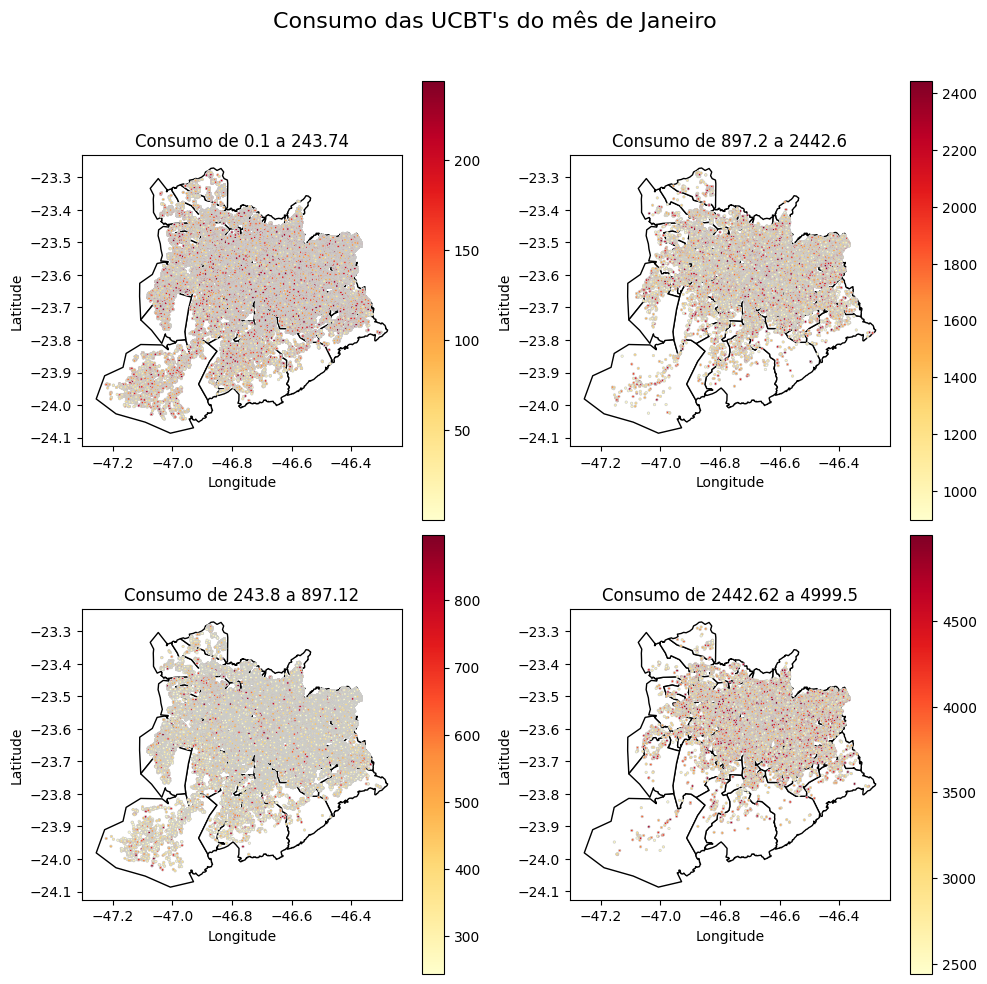

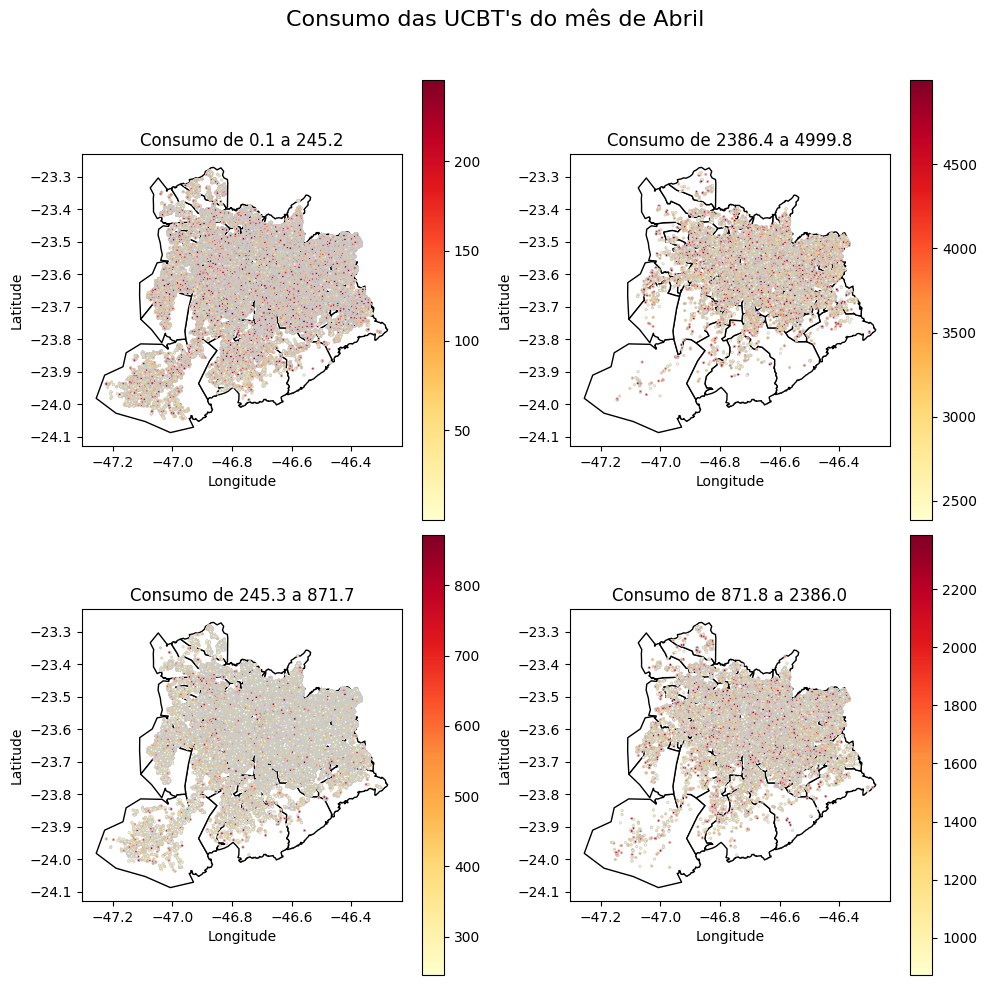

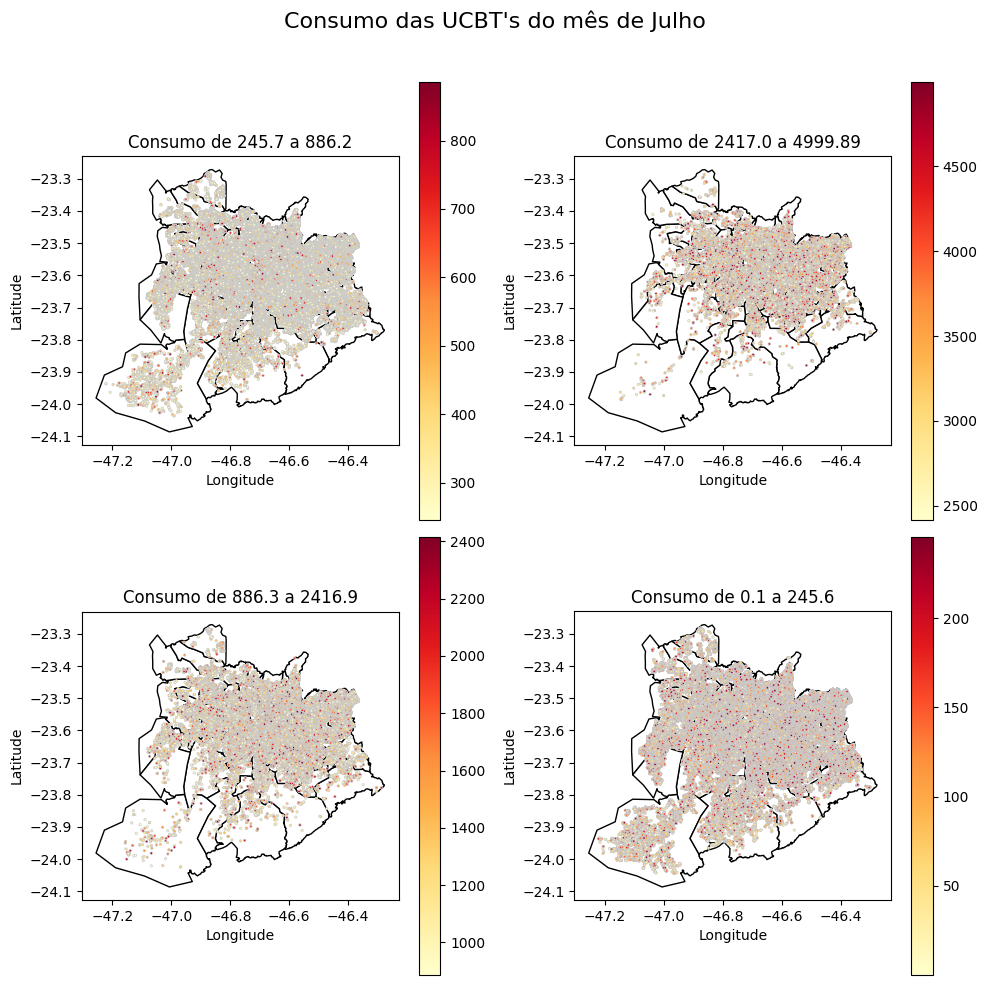

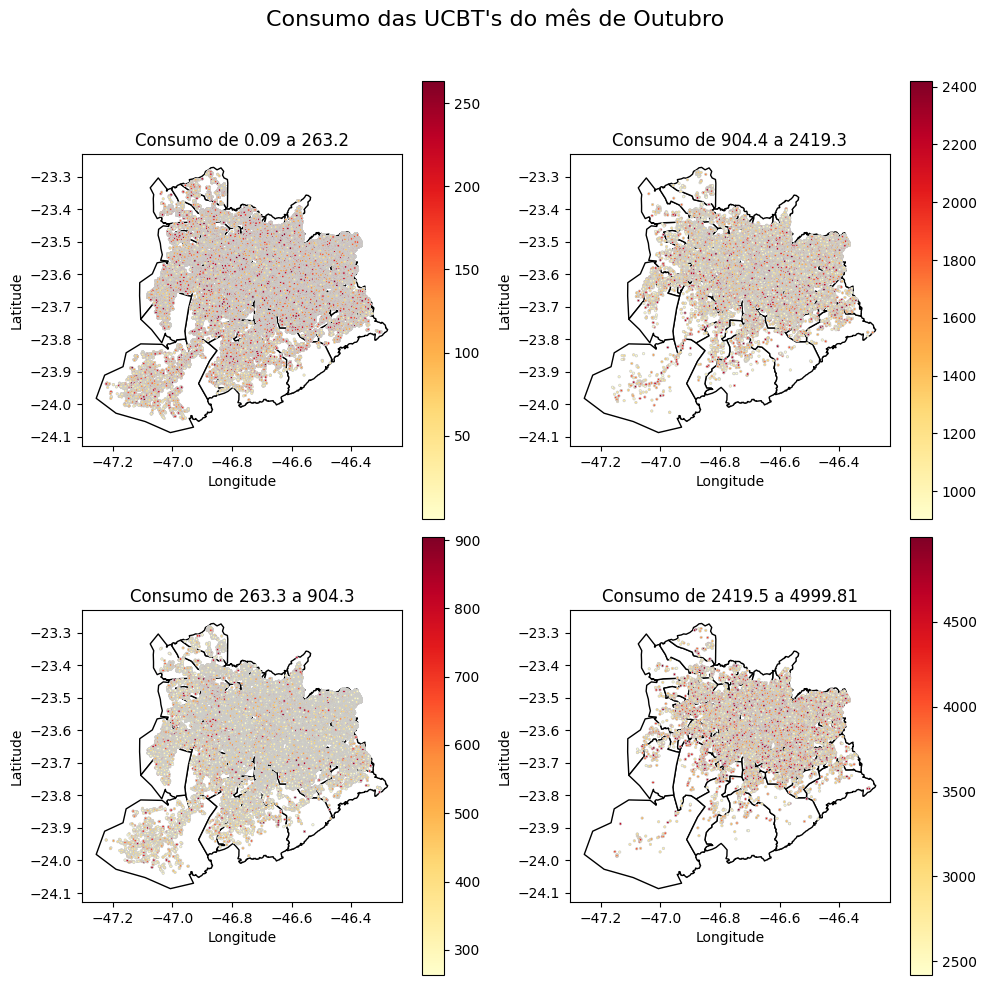

In [7]:
create_map_point(final_gdf)